# The following uses three evaluation criteria to find the optimal K value for clustering

（Reference: https://www.cnblogs.com/tszr/p/10061012.html）

In [37]:
a = pd.DataFrame([i for i in model.wv.vocab.keys()], columns=['word'])
b = pd.DataFrame(model.wv.vectors)
allkey=pd.concat([a, b], axis=1)

In [38]:
allkey

,word,0,1,2,3,4,5,6,7,8,...,190,191,192,193,194,195,196,197,198,199
0,原著,-0.637359,-0.963831,-0.294953,0.017067,-0.208064,-0.068881,0.860911,0.375294,0.683562,...,0.817420,0.456859,-0.500857,0.002015,0.193599,-0.326195,-1.077922,-0.126692,-0.066416,-0.167816
1,里,0.012454,0.768265,0.264111,-0.752077,0.265174,-0.481257,1.056647,-0.010520,0.927021,...,-0.102690,-0.950941,-0.032783,-0.463257,0.142336,0.280331,0.020445,-0.953896,-0.743527,-0.144640
2,萧战,-1.072723,0.694588,-0.375685,-0.170356,0.164390,-0.575351,0.103265,0.036521,-0.810982,...,0.772436,1.077037,-0.059708,-0.102354,0.189613,-0.110554,0.127362,-0.118400,0.146895,-0.316998
3,明明,-1.271282,-0.283754,-0.357850,0.398398,0.205662,0.177560,0.130323,-0.387612,0.605935,...,-0.284299,-0.001226,-0.458196,0.187031,-0.103248,0.589399,0.099182,0.990409,0.207960,0.261704
4,支持,-1.276898,1.798403,0.498526,0.815856,0.679698,-0.049985,-0.833131,0.468802,-0.416980,...,0.237444,-1.087764,0.027801,0.719896,0.253564,-0.067030,0.979672,0.370070,0.824626,-0.557286
5,萧炎,-0.765234,-0.013425,0.032772,-0.572517,0.898703,0.900553,0.258681,-0.003692,-0.376615,...,0.463353,0.373656,-0.184952,0.811595,-0.087632,0.302175,-0.796036,0.778122,0.065413,0.549927
6,修炼,-1.124821,-0.546468,-0.445667,-0.132380,-0.455815,-0.851731,0.127581,0.444156,0.883637,...,0.597809,0.801619,0.047298,0.444668,0.414619,-0.583012,-0.955131,-0.248382,-0.309719,0.560997
7,电视剧,-0.576981,0.129440,-1.191860,0.423921,-0.216641,0.357729,-0.329215,-0.400050,-0.438007,...,-0.232274,-0.724049,0.348383,-0.294561,0.328309,0.749613,-0.172052,-0.137204,0.485085,0.061210
8,去,-0.751307,0.362184,-0.197163,0.190889,-0.195754,0.093674,-0.338068,-0.462999,-0.062021,...,-0.816390,0.100050,0.290516,-0.580334,-0.204745,0.091735,-0.603571,-0.218159,0.679680,0.348207
9,药铺,-0.196241,-0.654457,0.518069,-0.464283,0.365748,0.138053,-0.316618,-0.131263,0.673381,...,-0.790738,-0.162762,-0.022883,0.846549,-0.412133,-0.413342,1.160498,0.203761,1.037059,-0.370433


In [39]:
words = allkey["word"] # wprd
vectors = allkey.iloc[:,1:] # vector

## Criteria 1: Sum of squares of dispersion within clusters
## 簇内离差平方和

In [40]:
# Draw a line chart of different k values ​​and the sum of squared deviations within the cluster
#构造自定义函数，用于绘制不同k值和对应总的簇内离差平方和的折线图
def k_SSE(X, clusters):
    K = range(1,clusters+1)
    TSSE = []
    for k in K:
        SSE = []
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        # Returns the cluster label
        labels = kmeans.labels_
        # Return cluster center
        centers = kmeans.cluster_centers_
        # Calculate the sum of squared deviations of each cluster sample and save it to the list
        # 计算各簇样本的离差平方和，并保存到列表中
        for label in set(labels):
            SSE.append(np.sum((X.loc[labels == label,]-centers[label,:])**2))
        # Calculate the sum of squares of total intra-cluster dispersion
        # 计算总的簇内离差平方和 
        TSSE.append(np.sum(SSE))

    # Chinese and minus sign normal display    
    # 中文和负号的正常显示
    plt.rcParams['font.sans-serif'] = [u'SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.style.use('ggplot')

    plt.plot(K, TSSE, 'b*-')
    plt.xlabel('簇的个数')
    plt.ylabel('簇内离差平方和之和')

    plt.show()


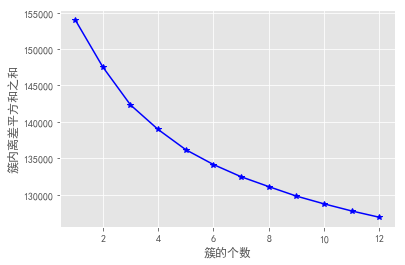

In [41]:
# call the Custom function (specify raw data and select k range)
# 自定义函数的调用（指定原始数据和选取k值范围）
k_SSE(vectors, 12)

## Criteria 2: Contour factor

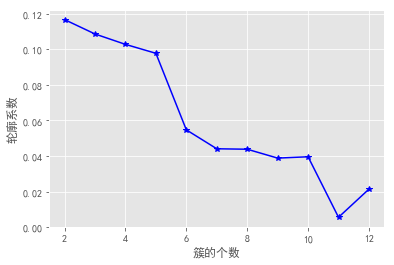

In [42]:
from sklearn import metrics

def k_silhouette(X, clusters):
    K = range(2,clusters+1)
    S = []
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        labels = kmeans.labels_
        
        # Call the silhouette_score function in the word module metrics to calculate the average contour coefficient
        # 调用字模块metrics中的silhouette_score函数，计算平均轮廓系数
        S.append(metrics.silhouette_score(X, labels, metric='euclidean'))

    plt.rcParams['font.sans-serif'] = [u'SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.style.use('ggplot')    

    plt.plot(K, S, 'b*-')
    plt.xlabel('簇的个数')
    plt.ylabel('轮廓系数')
    plt.show()
    
k_silhouette(vectors, 12)

## Criteria 3: Interval statistics method (Time consumption: about 30 minutes, CPU: Intel 8750H, plug-in operation, about 3.8GHz)


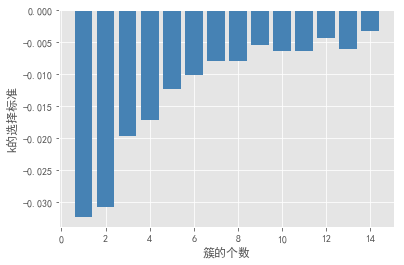

In [73]:
def short_pair_wise_D(each_cluster):
    mu = each_cluster.mean(axis = 0)
    Dk = sum(sum((each_cluster - mu)**2)) * 2.0 * each_cluster.shape[0]
    return Dk

# Calculate Wk values ​​within a cluster
# 计算簇内的Wk值
def compute_Wk(data, classfication_result):
    Wk = 0
    label_set = set(classfication_result)
    for label in label_set:
        each_cluster = data[classfication_result == label, :]
        Wk = Wk + short_pair_wise_D(each_cluster)/(2.0*each_cluster.shape[0])
    return Wk

# Calculating GAP Statistics
# 计算GAP统计量 
def gap_statistic(X, B=10, K=range(1,16), N_init = 10):
    X = np.array(X)
    #Generate group B reference data
    # 生成B组参照数据
    shape = X.shape
    tops = X.max(axis=0)
    bots = X.min(axis=0)
    dists = np.matrix(np.diag(tops-bots))
    rands = np.random.random_sample(size=(B,shape[0],shape[1]))
    for i in range(B):
        rands[i,:,:] = rands[i,:,:]*dists+bots
    
    gaps = np.zeros(len(K))
    Wks = np.zeros(len(K))
    Wkbs = np.zeros((len(K),B))
    for idxk, k in enumerate(K):
        k_means =  KMeans(n_clusters=k)
        k_means.fit(X)
        classfication_result = k_means.labels_
        Wks[idxk] = compute_Wk(X,classfication_result)
        
        # Through the loop, calculate the Wk value of each cluster under each reference data set
        # 通过循环，计算每一个参照数据集下的各簇Wk值
        for i in range(B):
            Xb = rands[i,:,:]
            k_means.fit(Xb)
            classfication_result_b = k_means.labels_
            Wkbs[idxk,i] = compute_Wk(Xb,classfication_result_b)

    # gaps、sd_ks、sk and gapDiff
    gaps = (np.log(Wkbs)).mean(axis = 1) - np.log(Wks)        
    sd_ks = np.std(np.log(Wkbs), axis=1)
    sk = sd_ks*np.sqrt(1+1.0/B)
    
    # The criterion used to determine the best k. When gapDiff is positive for the first time, the corresponding k is the target value.
    # 用于判别最佳k的标准，当gapDiff首次为正时，对应的k即为目标值
    gapDiff = gaps[:-1] - gaps[1:] + sk[1:]
    
    plt.rcParams['font.sans-serif'] = [u'SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.style.use('ggplot')
    plt.bar(np.arange(len(gapDiff))+1, gapDiff, color = 'steelblue')
    plt.xlabel('簇的个数')
    plt.ylabel('k的选择标准')
    plt.show()
    
gap_statistic(vectors) 

In [74]:
#cluster
k_means =  KMeans(n_clusters=14)
k_means.fit(vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=14, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
from sklearn.manifold import TSNE

#TSNE dimensionality reduction
tsne = TSNE(n_components=2)
bi_dimention = tsne.fit_transform(vectors)

In [75]:
#random color
color_corpus=['#DC143C','#FF69B4','#8B008B','#7B68EE','#0000CD','#6495ED','#87CEFA','#F08080','#00BFFF','#32CD32','#FF6347','#BA55D3','#800000','#FFD700','#00FFFF','#FFC0CB','#778899','#7FFFAA','#808080','#FF8C00']
random.shuffle(color_corpus)

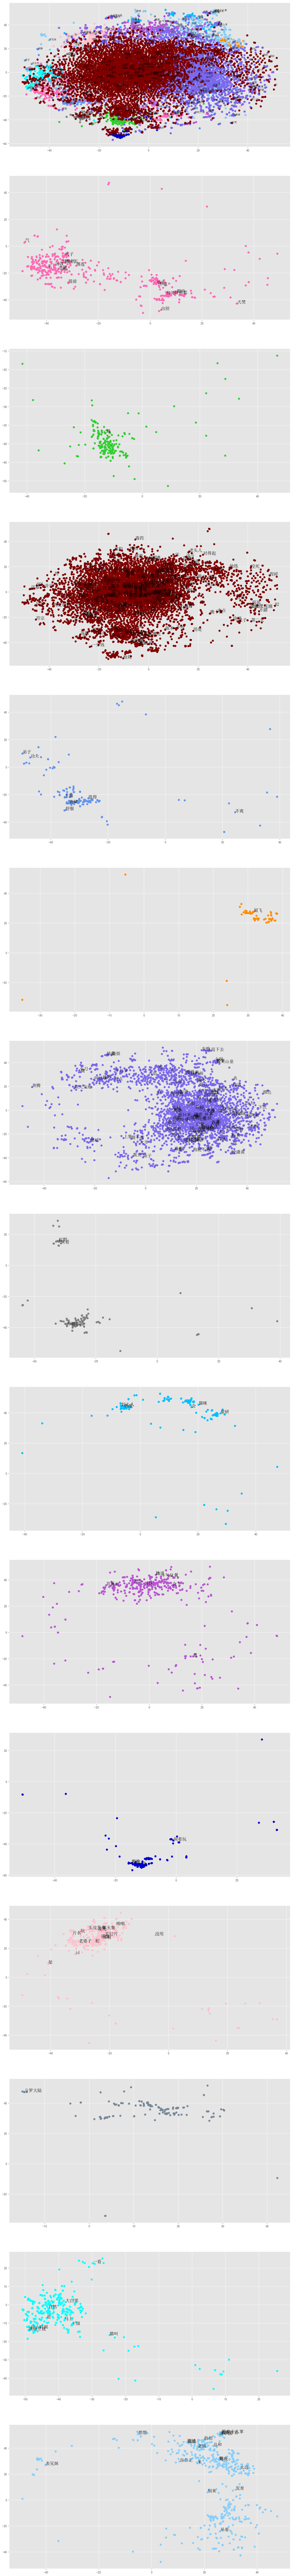

In [79]:
fig,ax = plt.subplots(len(k_means.cluster_centers_)+1,1,figsize=(16,10*len(k_means.cluster_centers_)+10), dpi= 150)
# Scatter plot
for i in range(bi_dimention.shape[0]):
    ax[0].scatter(bi_dimention[i,0],bi_dimention[i,1],c=color_corpus[int(k_means.labels_[i])])
    ax[int(k_means.labels_[i])+1].scatter(bi_dimention[i,0],bi_dimention[i,1],c=color_corpus[int(k_means.labels_[i])])
# Mark
font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=8) 
sub_font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14) 
wds = list(model.wv.vocab)
for i, wd in enumerate(wds):
    # Random labeling, about 3% probability
    # 随机标注，大约是百分之三的概率
    if np.random.normal()>1.88:
        ax[int(k_means.labels_[i])+1].annotate(wd, xy=(bi_dimention[i, 0], bi_dimention[i, 1]),fontproperties=sub_font_set)
        ax[0].annotate(wd, xy=(bi_dimention[i, 0], bi_dimention[i, 1]),fontproperties=font_set)